## Trabalho de Análise Descritiva de um Conjunto de Dados
Realize uma análise descritiva básica de um conjunto de dados retirados da Pesquisa Nacional por Amostra de Domicílios - 2015 do IBGE. 

Vamos construir histogramas, calcular e avaliar medidas de tendência central, medidas separatrizes e de dispersão dos dados.

Siga o roteiro proposto e vá completando as células vazias. Procure pensar em mais informações interessantes que podem ser exploradas em nosso dataset.

# <font color=green>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

***
***

### Importando as biblioteca necessárias para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, seaborn</font>

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Importando o dataset e armazenando o conteúdo em uma DataFrame

In [49]:
dados = pd.read_csv('dados.csv')

### Visualizando o conteúdo do DataFrame

In [50]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


### Para avaliarmos o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)
#### <font color='blue'>Descrever os pontos mais relevantes observados na tabela e no gráfico.</font>

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Para construir as classes de renda, considerei que o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.

### 1º Definir os intevalos das classes em reais (R$)

In [51]:
dados.Renda.max()

200000

In [52]:
dados.Renda.min()

0

In [53]:
classes = [0,1576,3940,11820,19700,200000]

### 2º Definir os labels das classes

In [54]:
labels = ['E','D','C','B','A']

### 3º Construir a coluna de frequências

In [55]:
frequencia = pd.value_counts(
    pd.cut(x = dados.Renda,
           bins = classes,
           labels = labels,
           include_lowest = True)
)
frequencia

E    49755
D    18602
C     7241
B      822
A      420
Name: Renda, dtype: int64

### 4º Construir a coluna de percentuais

In [56]:
percentual = pd.value_counts(
    pd.cut(x = dados.Renda,
           bins = classes,
           labels = labels,
           include_lowest = True), normalize = True
) * 100
percentual

E    64.751432
D    24.208745
C     9.423477
B     1.069755
A     0.546590
Name: Renda, dtype: float64

### 5º Juntar as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

In [57]:
tabela = pd.DataFrame({'Frequência': frequencia, 'Porcentagem (%)': percentual})
tabela.rename_axis('Categoria de Rendas', axis = 'columns', inplace = True)
tabela

Categoria de Rendas,Frequência,Porcentagem (%)
E,49755,64.751432
D,18602,24.208745
C,7241,9.423477
B,822,1.069755
A,420,0.546590


In [58]:
tabela.sort_index(ascending = False)

Categoria de Rendas,Frequência,Porcentagem (%)
A,420,0.546590
B,822,1.069755
C,7241,9.423477
D,18602,24.208745
E,49755,64.751432


### Construindo um gráfico de barras para visualizar as informações da tabela de frequências acima

<AxesSubplot:>

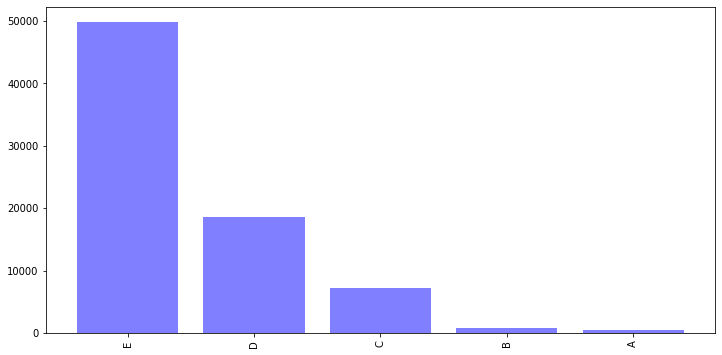

In [59]:
tabela['Frequência'].plot.bar(width = 0.8, color = 'blue', alpha = 0.5, figsize = (12,6))

> ### Conclusões

Por meio da definição das classes com base nos salários mínimos ganhos, e logo após a criação do gráfico, podemos chegar a conclusão de que no dataset dos dados mais de 64% da população possui uma renda igual ou inferior a dois salários mínimos, enquanto as demais classes se encontram como minoria.

### Criando um histograma para as variáveis QUANTITATIVAS de nosso dataset
#### <font color='blue'>Descrever os pontos mais relevantes observados nos gráficos (assimetrias e seus tipos, possíveis causas para determinados comportamentos etc.)</font>

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribuição de Frequências - Idade'}, xlabel='Idade', ylabel='Quantidade de Pessoas p/ Idade'>

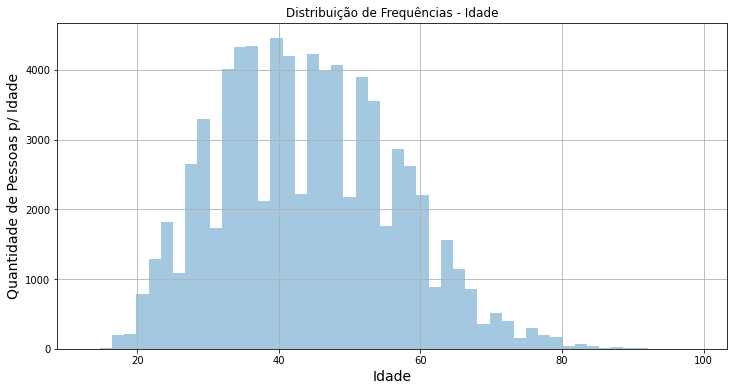

In [60]:
ax = sns.distplot(dados.Idade, kde = False)

ax.figure.set_size_inches(12,6)

ax.set_title('Distribuição de Frequências - Idade')

ax.set_xlabel('Idade', fontsize = 14)

ax.set_ylabel('Quantidade de Pessoas p/ Idade', fontsize = 14)
plt.grid()
ax

In [61]:
dados.Idade.value_counts()

40    2263
45    2250
37    2235
43    2213
35    2206
      ... 
13       1
97       1
94       1
14       1
99       1
Name: Idade, Length: 84, dtype: int64

<AxesSubplot:title={'center':'Distribuição de Frequências - Altura'}, xlabel='Metros', ylabel='Quantidades de Pessoas p/ Altura'>

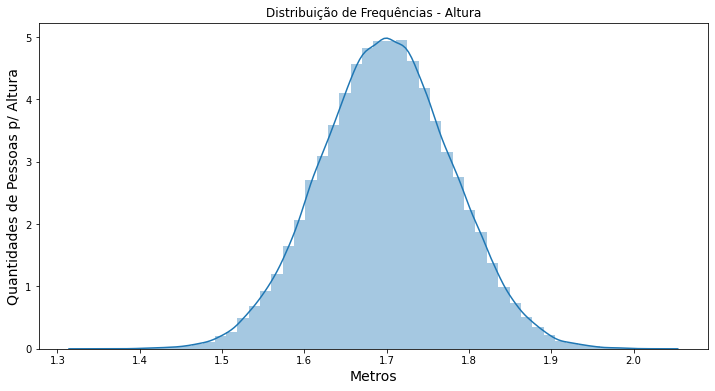

In [62]:
ax = sns.distplot(dados.Altura, kde = True)

ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de Frequências - Altura')
ax.set_xlabel('Metros', fontsize = 14)
ax.set_ylabel('Quantidades de Pessoas p/ Altura', fontsize = 14)
ax

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribuição de Frequências - Anos de Estudo'}, xlabel='Anos', ylabel='Quantidades de Pessoas p/ Anos de Estudos'>

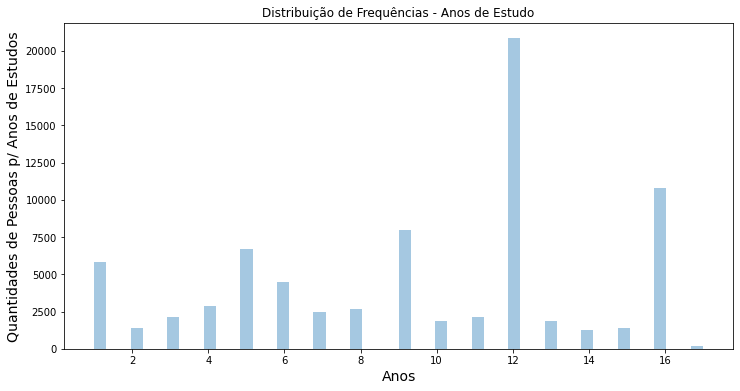

In [63]:
ax = sns.distplot(dados['Anos de Estudo'], kde = False)

ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de Frequências - Anos de Estudo')
ax.set_xlabel('Anos', fontsize = 14)
ax.set_ylabel('Quantidades de Pessoas p/ Anos de Estudos', fontsize = 14)
ax

In [64]:
dados['Anos de Estudo'].value_counts()

12    20848
16    10795
9      7980
5      6729
1      5849
6      4499
4      2891
8      2689
7      2445
11     2118
3      2101
10     1840
13     1836
15     1388
2      1388
14     1253
17      191
Name: Anos de Estudo, dtype: int64

> ### Conclusões

Com base nos dados retornados dos gráficos, podemos inferir que a idade possui uma assimetria à direita, enquanto a altura se comporta como uma simétrica bem feita, e os anos de estudo possuem uma certa assimetria à esquerda. A partir disso, podemos imaginar os valores de moda, mediana e média para estas variáveis.

Idade: Chefes de família com idade entre 35 a 45 anos são os mais destacados.
Altura: Por ser uma altura padrão entre a maioria das pessoas, 1.7m se fez mais presente no histograma.
Anos de estudo: Por provavelmente concluirem toda a grade, passando graduação, pós, mestrado e etc, a maioria da população chefe entrevistada possui cerca de 12 anos de estudo.

### Para a variável RENDA, construir um histograma somente com as informações das pessoas com rendimento até R$ 20.000,00

<AxesSubplot:title={'center':'Distribuição de Frequências - RENDA - Pessoas com renda até R$20000,00'}, xlabel='R$', ylabel='Density'>

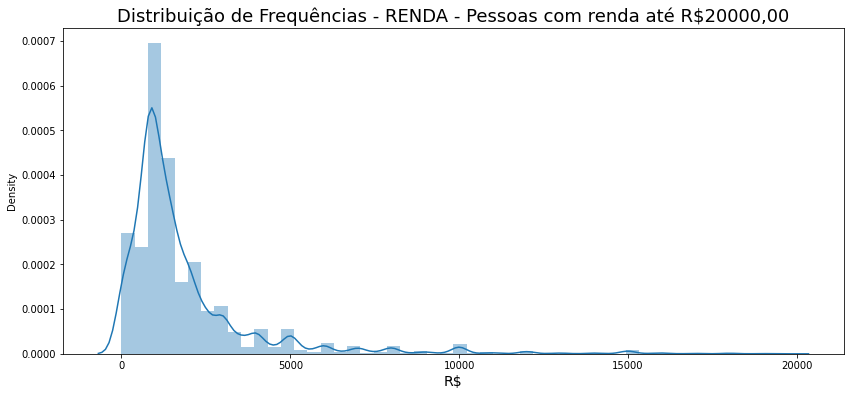

In [65]:
ax = sns.distplot(dados.query('Renda < 20000').Renda)
ax.figure.set_size_inches(14,6)
ax.set_title('Distribuição de Frequências - RENDA - Pessoas com renda até R$20000,00', fontsize = 18)
ax.set_xlabel('R$', fontsize = 14)
ax

### Construindo uma tabela de frequências e uma com os percentuais do cruzando das variáveis SEXO e COR
#### <font color='blue'>Avaliando o resultado da tabela e relatando as principais conclusões</font>


In [66]:
sexo = {
    0: 'Masculino', 
    1: 'Feminino'
}
cor = {
    0: 'Indígena', 
    2: 'Branca', 
    4: 'Preta', 
    6: 'Amarela', 
    8: 'Parda', 
    9: 'Sem declaração'
}
anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano', 
    2: '1 ano', 
    3: '2 anos', 
    4: '3 anos', 
    5: '4 anos', 
    6: '5 anos', 
    7: '6 anos', 
    8: '7 anos', 
    9: '8 anos', 
    10: '9 anos', 
    11: '10 anos', 
    12: '11 anos', 
    13: '12 anos', 
    14: '13 anos', 
    15: '14 anos', 
    16: '15 anos ou mais', 
    17: 'Não determinados'
}
uf = {
    11: 'Rondônia', 
    12: 'Acre', 
    13: 'Amazonas', 
    14: 'Roraima', 
    15: 'Pará', 
    16: 'Amapá', 
    17: 'Tocantins', 
    21: 'Maranhão', 
    22: 'Piauí', 
    23: 'Ceará', 
    24: 'Rio Grande do Norte', 
    25: 'Paraíba', 
    26: 'Pernambuco', 
    27: 'Alagoas', 
    28: 'Sergipe', 
    29: 'Bahia', 
    31: 'Minas Gerais', 
    32: 'Espírito Santo', 
    33: 'Rio de Janeiro', 
    35: 'São Paulo', 
    41: 'Paraná', 
    42: 'Santa Catarina', 
    43: 'Rio Grande do Sul', 
    50: 'Mato Grosso do Sul', 
    51: 'Mato Grosso', 
    52: 'Goiás', 
    53: 'Distrito Federal'
}

In [67]:
frequencia = pd.crosstab(dados.Sexo, dados.Cor)
frequencia.rename(columns=cor, inplace = True)
frequencia.rename(index=sexo,inplace = True)
frequencia

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [68]:
percentual = pd.crosstab(dados.Sexo, dados.Cor, normalize = True)*100
percentual.rename(columns=cor, inplace = True)
percentual.rename(index=sexo,inplace = True)
percentual

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,0.333160,28.883394,7.160333,0.305830,32.617126
Feminino,0.131442,12.520822,3.759761,0.152264,14.135867


> ### Conclusões
Nestas tabelas conseguimos analisar perfeitamente a quantidade de pessoas por sexo e cor entrevistadas.

## Realizar, para a variável RENDA, uma análise descritiva com as ferramentas estatísticas.

### Obtendo a média aritimética

In [69]:
dados.Renda.mean()

2000.3831988547631

### Obtendo a mediana

In [70]:
dados.Renda.median()

1200.0

### Obtendo a moda

In [71]:
dados.Renda.mode()[0]

788

### Obtendo o desvio médio absoluto

In [72]:
dados.Renda.mad()

1526.4951371638058

### Obtendo a variância

In [73]:
dados.Renda.var()

11044906.006217021

### Obtendo o desvio-padrão

In [74]:
dados.Renda.std()

3323.3877303464037

### Obtendo a média, mediana e valor máximo da variável RENDA segundo SEXO e COR
#### <font color='blue'>Relatar os pontos mais importantes observados nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mean', 'median', 'max'}</i></font>

In [75]:
frequenciamedia = pd.crosstab(dados.Sexo, dados.Cor,
                         aggfunc = 'mean',
                         values = dados.Renda)
frequenciamedia.rename(columns=cor, inplace = True)
frequenciamedia.rename(index=sexo,inplace = True)
frequenciamedia


#retorna a tabela com a media de renda por sexo e cor

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,1081.710938,2925.744435,1603.861687,4758.251064,1659.577425
Feminino,2464.386139,2109.866750,1134.596400,3027.341880,1176.758516


In [76]:
frequencia_mediana = pd.crosstab(dados.Sexo, dados.Cor,
                                 aggfunc = 'median',
                                 values = dados.Renda)
frequencia_mediana.rename(columns=cor, inplace = True)
frequencia_mediana.rename(index=sexo,inplace = True)
frequencia_mediana

#retorna a tabela com a mediana de renda por sexo e cor

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,797.5,1700.0,1200.0,2800.0,1200.0
Feminino,788.0,1200.0,800.0,1500.0,800.0


In [77]:
frequencia_max = pd.crosstab(dados.Sexo, dados.Cor,
                             aggfunc = 'max',
                             values = dados.Renda)
frequencia_max.rename(columns=cor, inplace = True)
frequencia_max.rename(index=sexo,inplace = True)
frequencia_max

#retorna a tabela com os valores máximos de renda por sexo e cor

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,10000,200000,50000,50000,100000
Feminino,120000,100000,23000,20000,30000


> ### Conclusões

Com base nas medidas de têndencia central, podemos analisar como os dados se comportam ao tirar sua média, mediana e moda.
Média: A média de salário do chefe de família é por volta de R$2000,00.
Mediana: O valor que divide exatamente 50% dos dados para cima e 50% para baixo é o valor de R$1200,00.
Moda: O valor que mais se repete é o próprio salário mínimo daquele ano em que a pesquisa foi realizada.

Após a análise pura dessas medidas, podemos visualizar por meio de uma tabela, cruzando variáveis como sexo e cor e observando quais são as médias, medianas e valores máximos de renda para cada um.

### Obtendo as medidas de dispersão da variável RENDA segundo SEXO e COR
#### <font color='blue'>Relatar os pontos mais importantes observados nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mad', 'var', 'std'}</i></font>

In [78]:
frequencia_desv_abs = pd.crosstab(dados.Sexo, dados.Cor,
                             aggfunc = 'mad',
                             values = dados.Renda)
frequencia_desv_abs.rename(columns=cor, inplace = True)
frequencia_desv_abs.rename(index=sexo,inplace = True)
frequencia_desv_abs

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,798.910889,2261.012346,975.602482,3709.597211,1125.827704
Feminino,3007.892952,1670.967106,705.453357,2549.146322,811.580946


In [79]:
frequencia_var = pd.crosstab(dados.Sexo, dados.Cor,
                             aggfunc = 'var',
                             values = dados.Renda)
frequencia_var.rename(columns=cor, inplace = True)
frequencia_var.rename(index=sexo,inplace = True)
frequencia_var


Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,1.449841e+06,2.257002e+07,3.749294e+06,3.295707e+07,5.345747e+06
Feminino,1.429818e+08,1.056909e+07,1.821960e+06,1.392166e+07,2.547960e+06


In [80]:
frequencia_desvstd = pd.crosstab(dados.Sexo, dados.Cor,
                             aggfunc = 'std',
                             values = dados.Renda)
frequencia_desvstd.rename(columns=cor, inplace = True)
frequencia_desvstd.rename(index=sexo,inplace = True)
frequencia_desvstd


Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,1204.093490,4750.791872,1936.309271,5740.82482,2312.087184
Feminino,11957.498292,3251.013154,1349.799809,3731.17366,1596.233048


> ### Conclusões

Com essas informações das medidas de dispersão, podemos analisar os desvios absolutos em comparação a média, com cada sexo e tipo de cor. Também podemos analisar a variância(que é bem baixa), significando que os valores não se distanciam muito da média. Para finalizar, podemos observar os valores de desvio padrão, demonstrando como eles estão bem distribuídos ou homogêneos em comparação a média.

### Construindo um box plot da variável RENDA segundo SEXO e COR
#### <font color='blue'>Verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados, avaliando o gráfico e destacando os pontos mais importantes.</font>
#### <font color='red'>1º - Utilizando somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>O boxplot pode ser utilizado para se estudar várias características do conjunto de dados. Por exemplo, para determinar a simetria dos dados basta observar se a média é igual (ou próxima) à mediana, pois, nesse caso, os dados são simétricos..</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

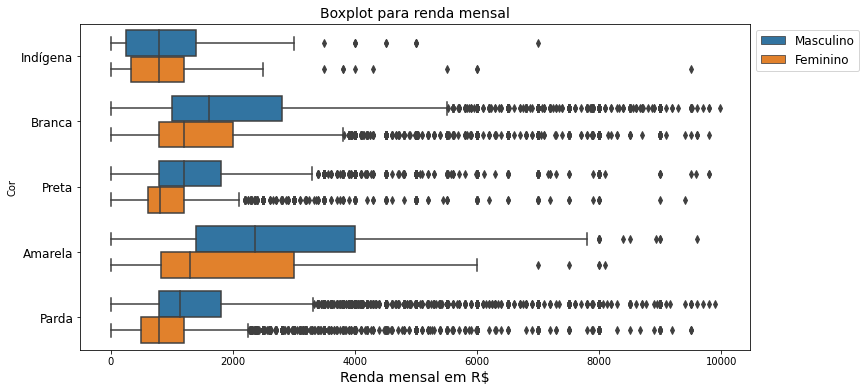

In [81]:
ax = sns.boxplot(x='Renda',y='Cor',data=dados.query('Renda < 10000'),orient='h',hue='Sexo')
ax.figure.set_size_inches(12,6)
ax.set_title('Boxplot para renda mensal',fontsize=14)
ax.set_xlabel('Renda mensal em R$',fontsize=14)
ax.set_yticklabels(['Indígena','Branca','Preta','Amarela','Parda'],fontsize=12)
handles,labels = ax.get_legend_handles_labels()
label = ['Masculino','Feminino']
ax.legend(handles,label,fontsize=12,bbox_to_anchor=(1,1))

> ### Conclusões

Neste box plot podemos observar diversas medidas, como a mediana está sendo puxada para a direita(casos de assimetria),podemos analisar como a maioria dos valores de renda por sexo e cor se concentram entre 0 e 2000, mas certas cores possuem uma renda superior, e principalmente o sexo masculino, onde possui uma renda superior em quase todas as cores comparadas as mesmas femininas.  

# <font color="red">DESAFIO<font>
### Qual percentual de pessoas de nosso <i>dataset</i> ganham um salário mínimo (R$ 788,00) ou menos?
#### <font color='red'>Utilize a função <i>percentileofscore()</i> do <i>scipy</i> para realizar estas análises.</font>
#### Mais informações: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html


In [82]:
from scipy import stats

percentual = stats.percentileofscore(dados.Renda, 788, kind = 'weak')
print("{0:.2f}%".format(percentual))



28.87%


### Qual o valor máximo ganho por 99% das pessoas de nosso <i>dataset</i>?
#### <font color='red'>Utilize o método <i>quantile()</i> do <i>pandas</i> para realizar estas análises.</font>

In [83]:
valor = dados.Renda.quantile(.99)
print("R$ {0:.2f}".format(valor))

R$ 15000.00


### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = ['mean', 'median', 'max', 'std']</i></font>

In [84]:
renda_estatisticas_por_sexo_e_estudo = pd.crosstab(dados['Anos de Estudo'], 
                                                   dados.Sexo,
                                                   aggfunc = {'mean', 'median', 'max', 'std'},
                                                   values = dados.Renda).round(2)
renda_estatisticas_por_sexo_e_estudo.rename(index = anos_de_estudo, inplace = True)
renda_estatisticas_por_sexo_e_estudo.rename(columns = sexo, inplace = True)
renda_estatisticas_por_sexo_e_estudo

max                mean           \
Sexo                           Masculino  Feminino Masculino Feminino   
Anos de Estudo                                                          
Sem instrução e menos de 1 ano   30000.0   10000.0    799.49   516.20   
1 ano                            30000.0    2000.0    895.63   492.77   
2 anos                           40000.0    4000.0    931.18   529.91   
3 anos                           80000.0    3500.0   1109.20   546.85   
4 anos                           50000.0   10000.0   1302.33   704.28   
5 anos                           35000.0    8000.0   1338.65   781.39   
6 anos                           25000.0    6000.0   1448.88   833.73   
7 anos                           40000.0    9000.0   1465.50   830.75   
8 anos                           30000.0   18000.0   1639.40   933.62   
9 anos                           60000.0   20000.0   1508.04   868.02   
10 anos                          45000.0    6000.0   1731.27   925.92   
11 anos                         200000.0  100000.0   2117.06  1286.79   
12 anos                          30000.0  120000.0   2470.33  1682.31   
13 anos                          25000.0   20000.0   3195.10  1911.73   
14 anos                          50000.0   20000.0   3706.62  2226.46   
15 anos ou mais                 200000.0  100000.0   6134.28  3899.51   
Não determinados                  7000.0    3000.0   1295.76   798.17   

                                  median                std           
Sexo                           Masculino Feminino Masculino Feminino  
Anos de Estudo                                                        
Sem instrução e menos de 1 ano     700.0    390.0   1023.90   639.31  
1 ano                              788.0    400.0   1331.95   425.29  
2 anos                             788.0    450.0   1435.17   498.23  
3 anos                             800.0    500.0   2143.80   424.12  
4 anos                            1000.0    788.0   1419.82   629.55  
5 anos                            1045.0    788.0   1484.65   635.78  
6 anos                            1200.0    788.0   1476.63   574.55  
7 anos                            1200.0    788.0   1419.71   602.04  
8 anos                            1300.0    800.0   1515.58   896.78  
9 anos                            1200.0    788.0   2137.66   973.22  
10 anos                           1218.0    800.0   2078.61   620.61  
11 anos                           1500.0   1000.0   2676.54  1819.04  
12 anos                           1800.0   1200.0   2268.08  4851.83  
13 anos                           2400.0   1300.0   2797.12  2053.79  
14 anos                           2500.0   1600.0   3987.21  2064.08  
15 anos ou mais                   4000.0   2800.0   7447.61  4212.77  
Não determinados                  1200.0    788.0    979.65   459.99

### Construa um box plot da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>

<AxesSubplot:title={'center':'Box-plot da RENDA por ESTADOS'}, xlabel='R$', ylabel='Estados'>

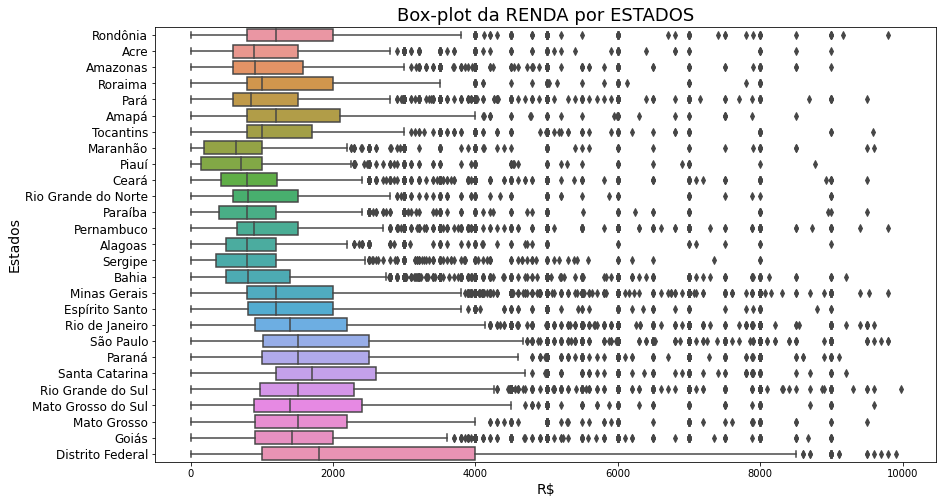

In [85]:
ax = sns.boxplot(x = 'Renda', y = 'UF', data=dados.query('Renda < 10000'), orient='h')

ax.figure.set_size_inches(14, 8)    # Personalizando o tamanho da figura

ax.set_title('Box-plot da RENDA por ESTADOS', fontsize=18)    # Configurando o título do gráfico

ax.set_xlabel('R$', fontsize=14)    # Configurando o label do eixo X

ax.set_ylabel('Estados', fontsize=14)    # Configurando o label do eixo Y
ax.set_yticklabels([key for key in uf.values()], fontsize=12)    # Configurando o label de cada categoria do eixo Y

ax

### Conclusões

Analisar como outliers(valores discrepantes) se comportam e influenciam em uma assimetria, além de ver como a renda em R$ se comporta por estado, onde muitos recebem menos que outros.